In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_data = pd.read_pickle('pickles/df_data.pkl')

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 31 columns):
date                   8475 non-null object
virus_present          8475 non-null int64
year                   8475 non-null float64
month                  8475 non-null float64
species                8475 non-null object
latitude               8475 non-null float64
longitude              8475 non-null float64
mosquito_cnt           8475 non-null int64
tmax                   8475 non-null int64
tmin                   8475 non-null int64
tavg                   8475 non-null float64
delta                  8475 non-null float64
dewpt                  8475 non-null float64
wetbulb                8475 non-null float64
heat                   8475 non-null float64
cool                   8475 non-null float64
sunrise                8475 non-null float64
sunset                 8475 non-null float64
codesum                8475 non-null object
snowdepth              8475 non-null float64
snow

In [4]:
from plotting_functions import *
# import functions plot_with_predict and plot_residuals

In [5]:
df_data['virus_present'].value_counts()

0    8018
1     457
Name: virus_present, dtype: int64

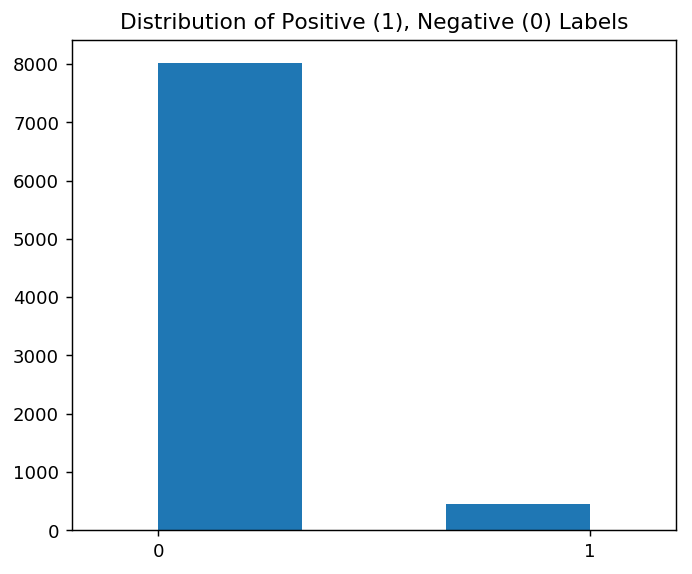

In [19]:
# very imbalanced label
plt.figure(figsize=(6,5),dpi=130)
plt.hist(df_data['virus_present'],bins=3)
plt.title('Distribution of Positive (1), Negative (0) Labels')
plt.xlim((-0.2,1.2))
plt.xticks([0,1]);

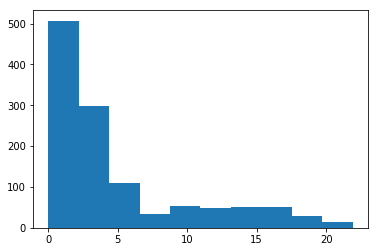

In [7]:
# can spray dist be used? by binning? might be better to focus only on the flag instead of dist
plt.hist(df_data[(df_data['spray_dist'] >= 0)]['spray_dist']);

In [8]:
# too much going on here - would need to split out every 2 characters esp because not all pairs separated by space
# most are NONE anyhow so could be included in a future study
df_data['codesum'].value_counts()

NONE                   4258
RA BR                   748
RA                      689
HZ                      686
TSRA RA BR              344
BR HZ                   314
TSRA RA                 284
BR                      268
TS BR                   132
RA BR HZ                127
TSRA RA BR VCTS         115
RA DZ BR                112
TS TSRA RA FG BR HZ     105
TS TSRA BR               88
TSRA BR HZ VCTS          69
TS TSRA RA               61
DZ BR                    34
RA HZ                    23
TS RA                    18
Name: codesum, dtype: int64

In [3]:
# convert species to 0/1 
df_species = pd.get_dummies(df_data['species'], prefix='species', drop_first=True)
df_data = df_data.join(df_species)
df_data.columns = df_data.columns.str.lower().str.replace(r'[/ ]+','_')

In [10]:
df_data.shape

(8475, 37)

In [11]:
df_data.columns

Index(['date', 'virus_present', 'year', 'month', 'species', 'latitude',
       'longitude', 'mosquito_cnt', 'tmax', 'tmin', 'tavg', 'delta', 'dewpt',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'snowdepth',
       'snowfall', 'precip', 'pressure', 'sealvlpressure', 'windspeed',
       'winddirection', 'avgspeed', 'spray_dist', 'last_spray_dist',
       'spray_targeted_prev', 'spray_targeted', 'species_culex_pipiens',
       'species_culex_pipiens_restuans', 'species_culex_restuans',
       'species_culex_salinarius', 'species_culex_tarsalis',
       'species_culex_territans'],
      dtype='object')

In [12]:
df_data['snowdepth'].value_counts()

0.0    8475
Name: snowdepth, dtype: int64

In [13]:
df_data['snowfall'].value_counts()

0.0    8475
Name: snowfall, dtype: int64

Apparently snowdepth and snowfall are useless, so they will not be included. But of course that makes sense since the data is May-Oct.

In [5]:
X_col = ['date', 'month', 'latitude',
       'longitude', 'mosquito_cnt', 'tmax', 'tmin', 'tavg', 'delta', 'dewpt',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 
        'precip', 'pressure', 'sealvlpressure', 'windspeed',
       'winddirection', 'avgspeed', 
       'spray_targeted_prev', 'spray_targeted', 'species_culex_pipiens',
       'species_culex_pipiens_restuans', 'species_culex_restuans',
       'species_culex_salinarius', 'species_culex_tarsalis',
       'species_culex_territans']

In [6]:
X = df_data[X_col]
y = df_data['virus_present']

In [8]:
# stratify since y-labels are unbalanced 
X_train, X_test, y_train, y_test = train_test_split(X[X_col], y, test_size=0.2,random_state=42,stratify=y)
df_train = X_train.join(y_train)
df_test = X_test.join(y_test)
df_train.to_pickle('pickles/df_train.pkl')
df_test.to_pickle('pickles/df_test.pkl')

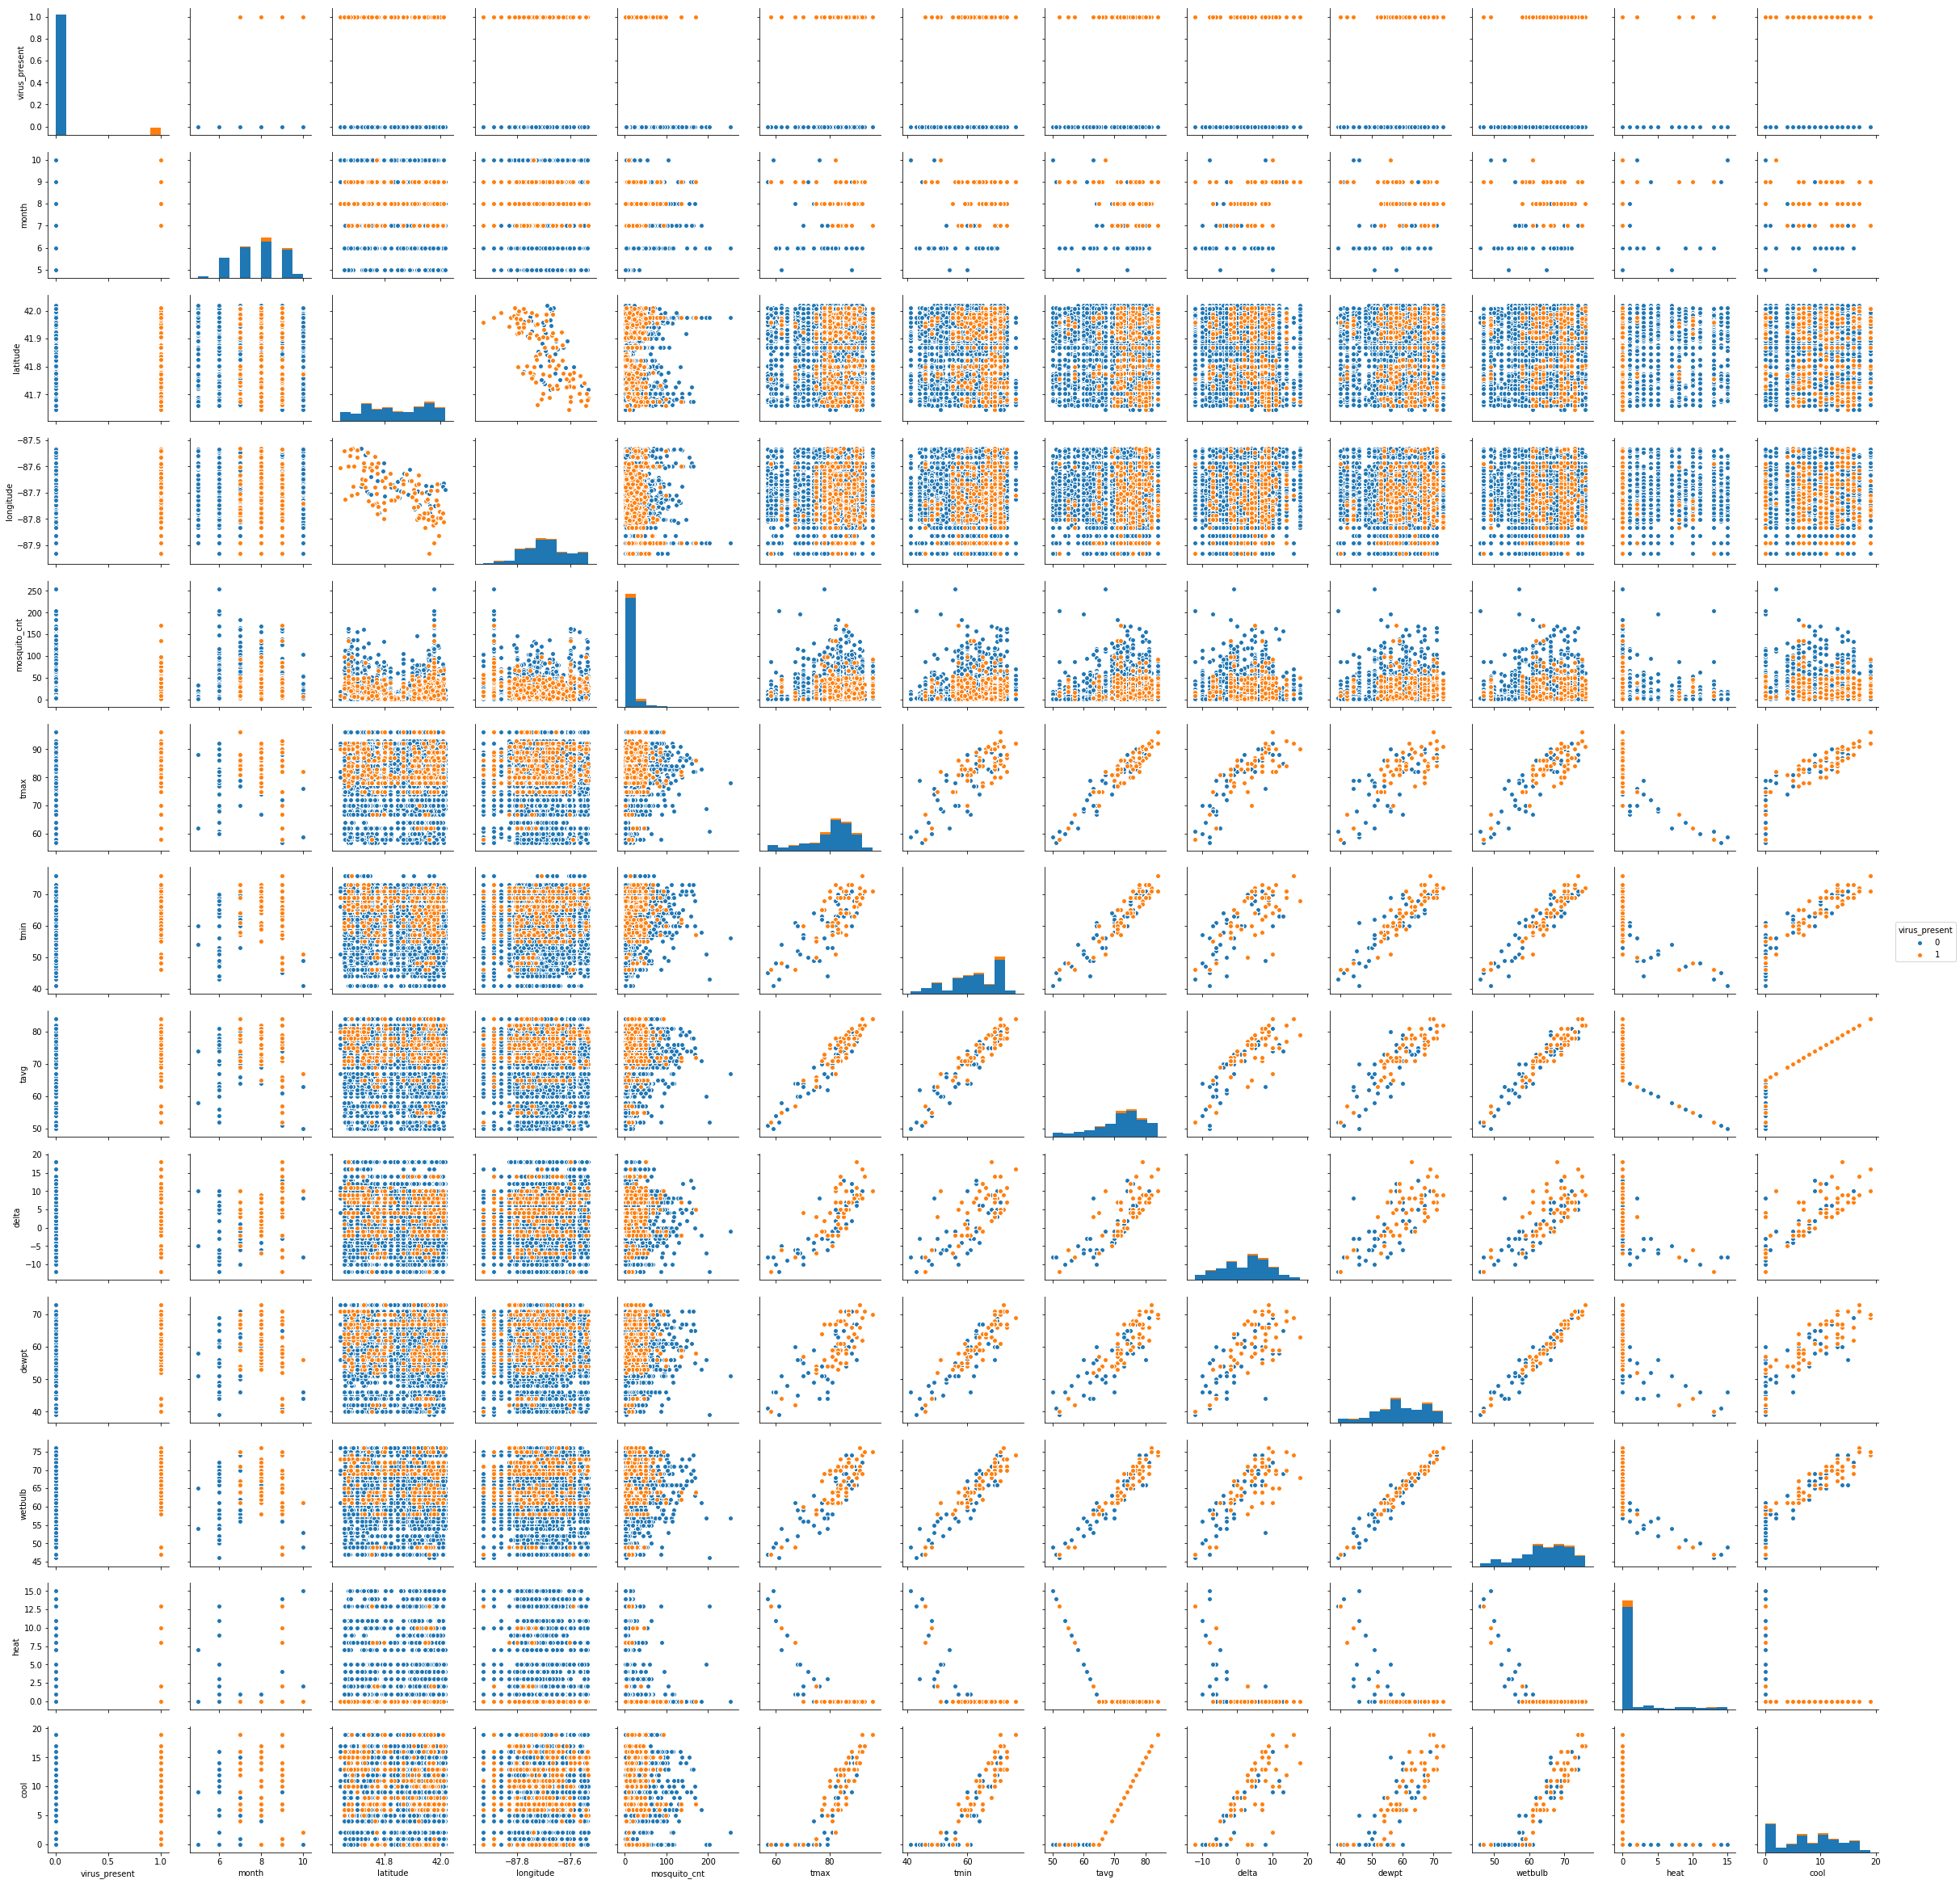

In [9]:
# check for non-normal distributions and collinearity
sns.pairplot(df_train[[df_train.columns[-1]]+X_col[1:13]],hue='virus_present')

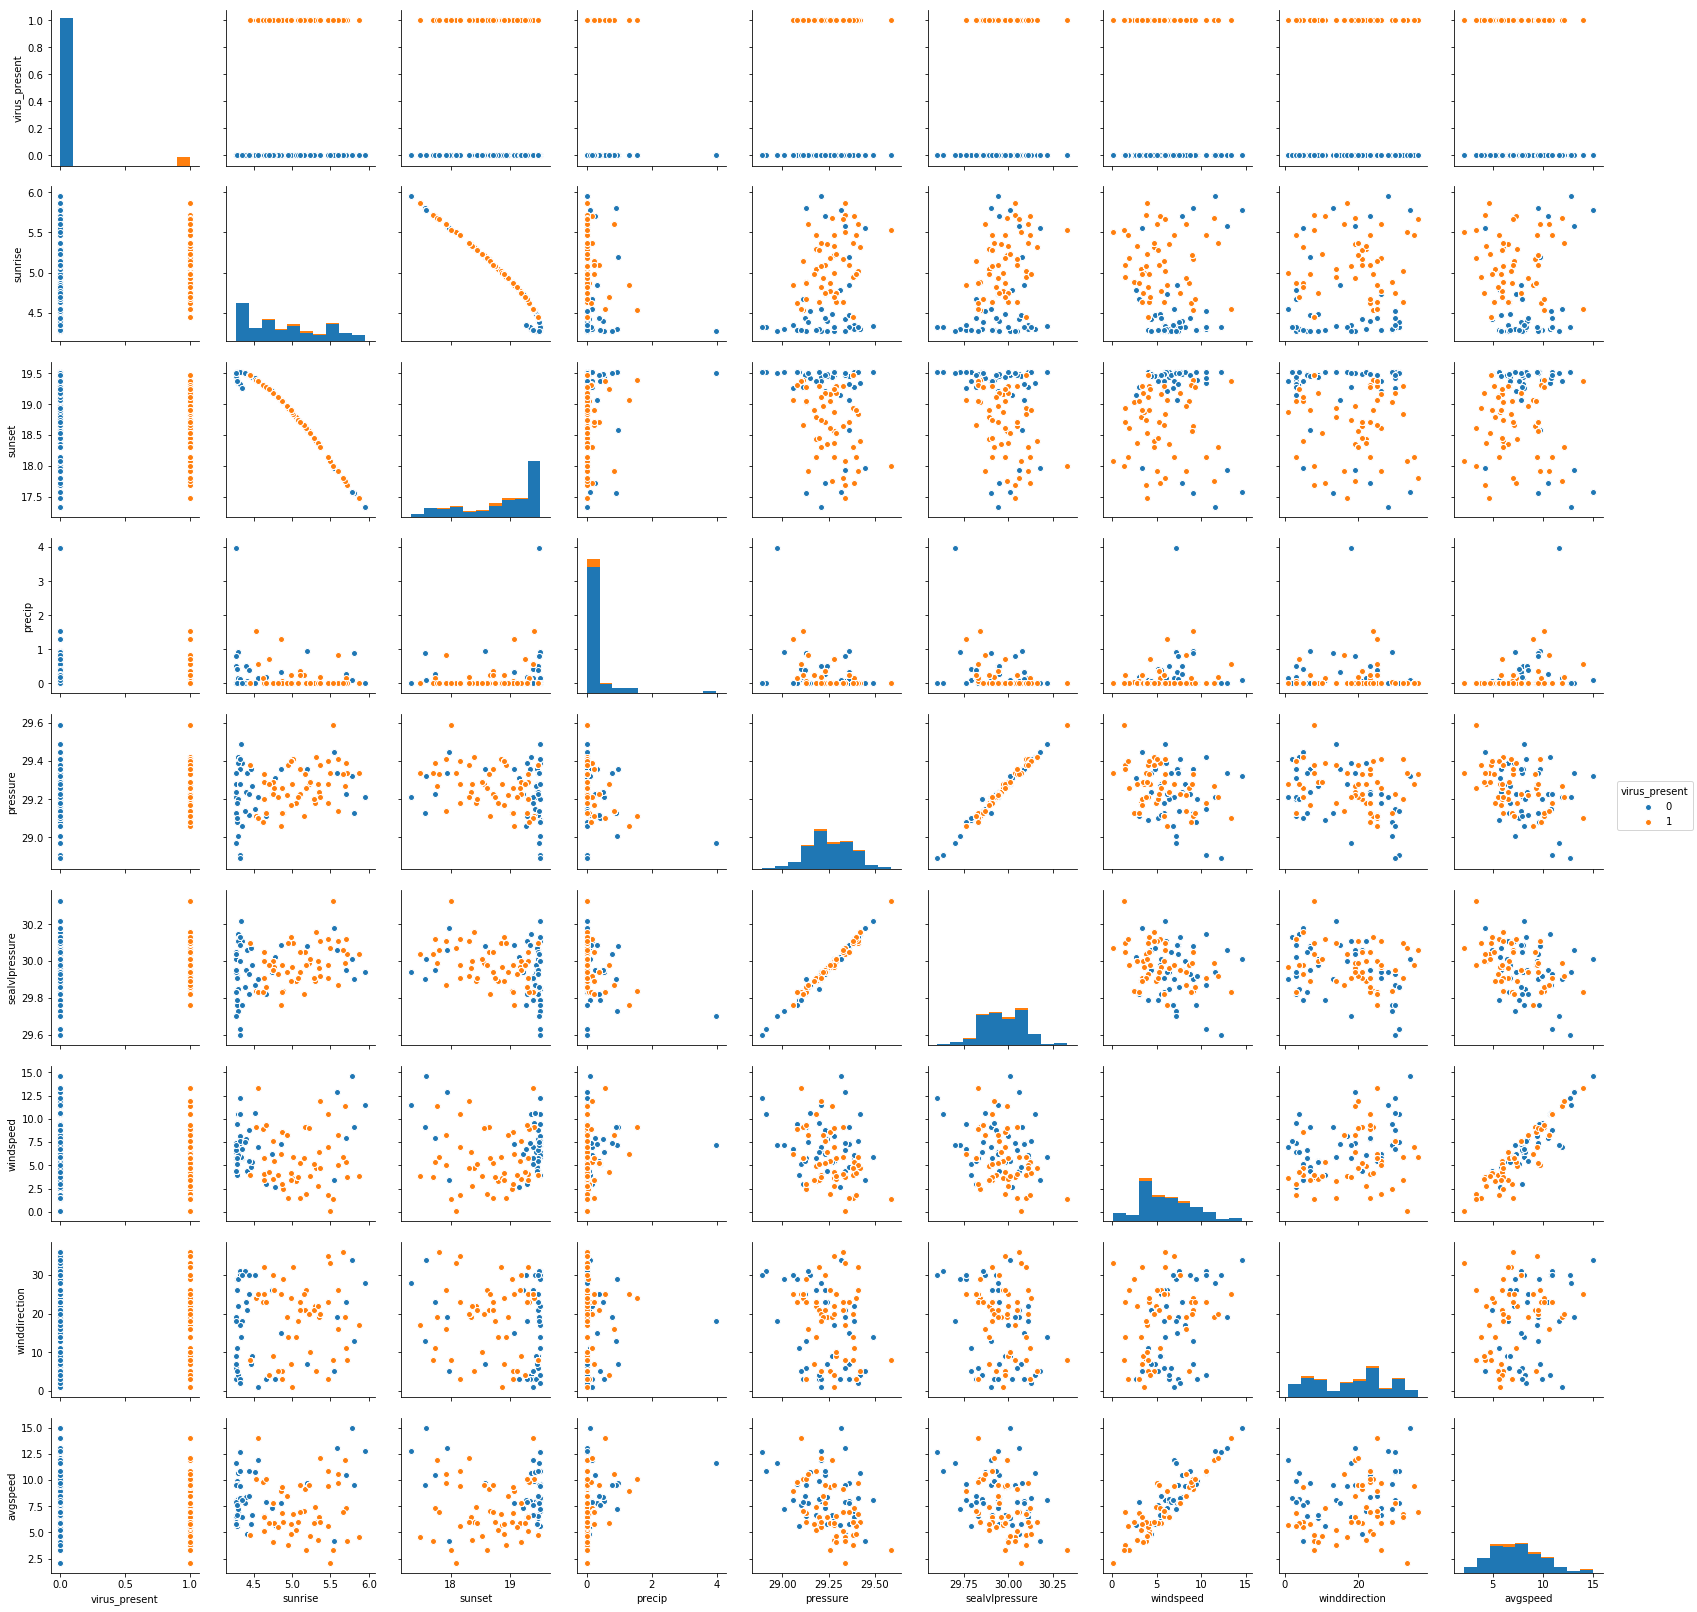

In [10]:
sns.pairplot(df_train[[df_train.columns[-1]]+X_col[13:21]],hue='virus_present')

In [11]:
#log transform based on histograms from pairplot
X_train['msqto_log'] = np.log(df_train['mosquito_cnt']+0.001)
X_train['heat_log'] = np.log(df_train['heat']+0.001)
X_train['sunset_log'] = np.log(df_train['sunset'].max()-df_train['sunset']+0.001)
X_train['precip_log'] = np.log(df_train['precip']+0.001)
df_train = X_train.join(y_train)
df_train.to_pickle('pickles/df_train.pkl')

X_test['msqto_log'] = np.log(df_test['mosquito_cnt']+0.001)
X_test['heat_log'] = np.log(df_test['heat']+0.001)
X_test['sunset_log'] = np.log(df_test['sunset'].max()-df_test['sunset']+0.001)
X_test['precip_log'] = np.log(df_test['precip']+0.001)
df_test = X_test.join(y_test)
df_test.to_pickle('pickles/df_test.pkl')

In [4]:
df_data['msqto_log'] = np.log(df_data['mosquito_cnt']+0.001)
df_data['heat_log'] = np.log(df_data['heat']+0.001)
df_data['sunset_log'] = np.log(df_data['sunset'].max()-df_data['sunset']+0.001)
df_data['precip_log'] = np.log(df_data['precip']+0.001)
pickle.dump(df_data,open('pickles/df_data_upd.pkl','wb'))

In [12]:
df_train.columns

Index(['date', 'month', 'latitude', 'longitude', 'mosquito_cnt', 'tmax',
       'tmin', 'tavg', 'delta', 'dewpt', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'precip', 'pressure', 'sealvlpressure', 'windspeed',
       'winddirection', 'avgspeed', 'spray_targeted_prev', 'spray_targeted',
       'species_culex_pipiens', 'species_culex_pipiens_restuans',
       'species_culex_restuans', 'species_culex_salinarius',
       'species_culex_tarsalis', 'species_culex_territans', 'msqto_log',
       'heat_log', 'sunset_log', 'precip_log', 'virus_present'],
      dtype='object')

In [13]:
X_col_log = ['date', 'month', 'latitude',
       'longitude', 'msqto_log', 'tmax', 'tmin', 'tavg', 'delta', 'dewpt',
       'wetbulb', 'heat_log', 'cool', 'sunrise', 'sunset_log', 
        'precip_log', 'pressure', 'sealvlpressure', 'windspeed',
       'winddirection', 'avgspeed', 
       'spray_targeted_prev', 'spray_targeted', 'species_culex_pipiens',
       'species_culex_pipiens_restuans', 'species_culex_restuans',
       'species_culex_salinarius', 'species_culex_tarsalis',
       'species_culex_territans']

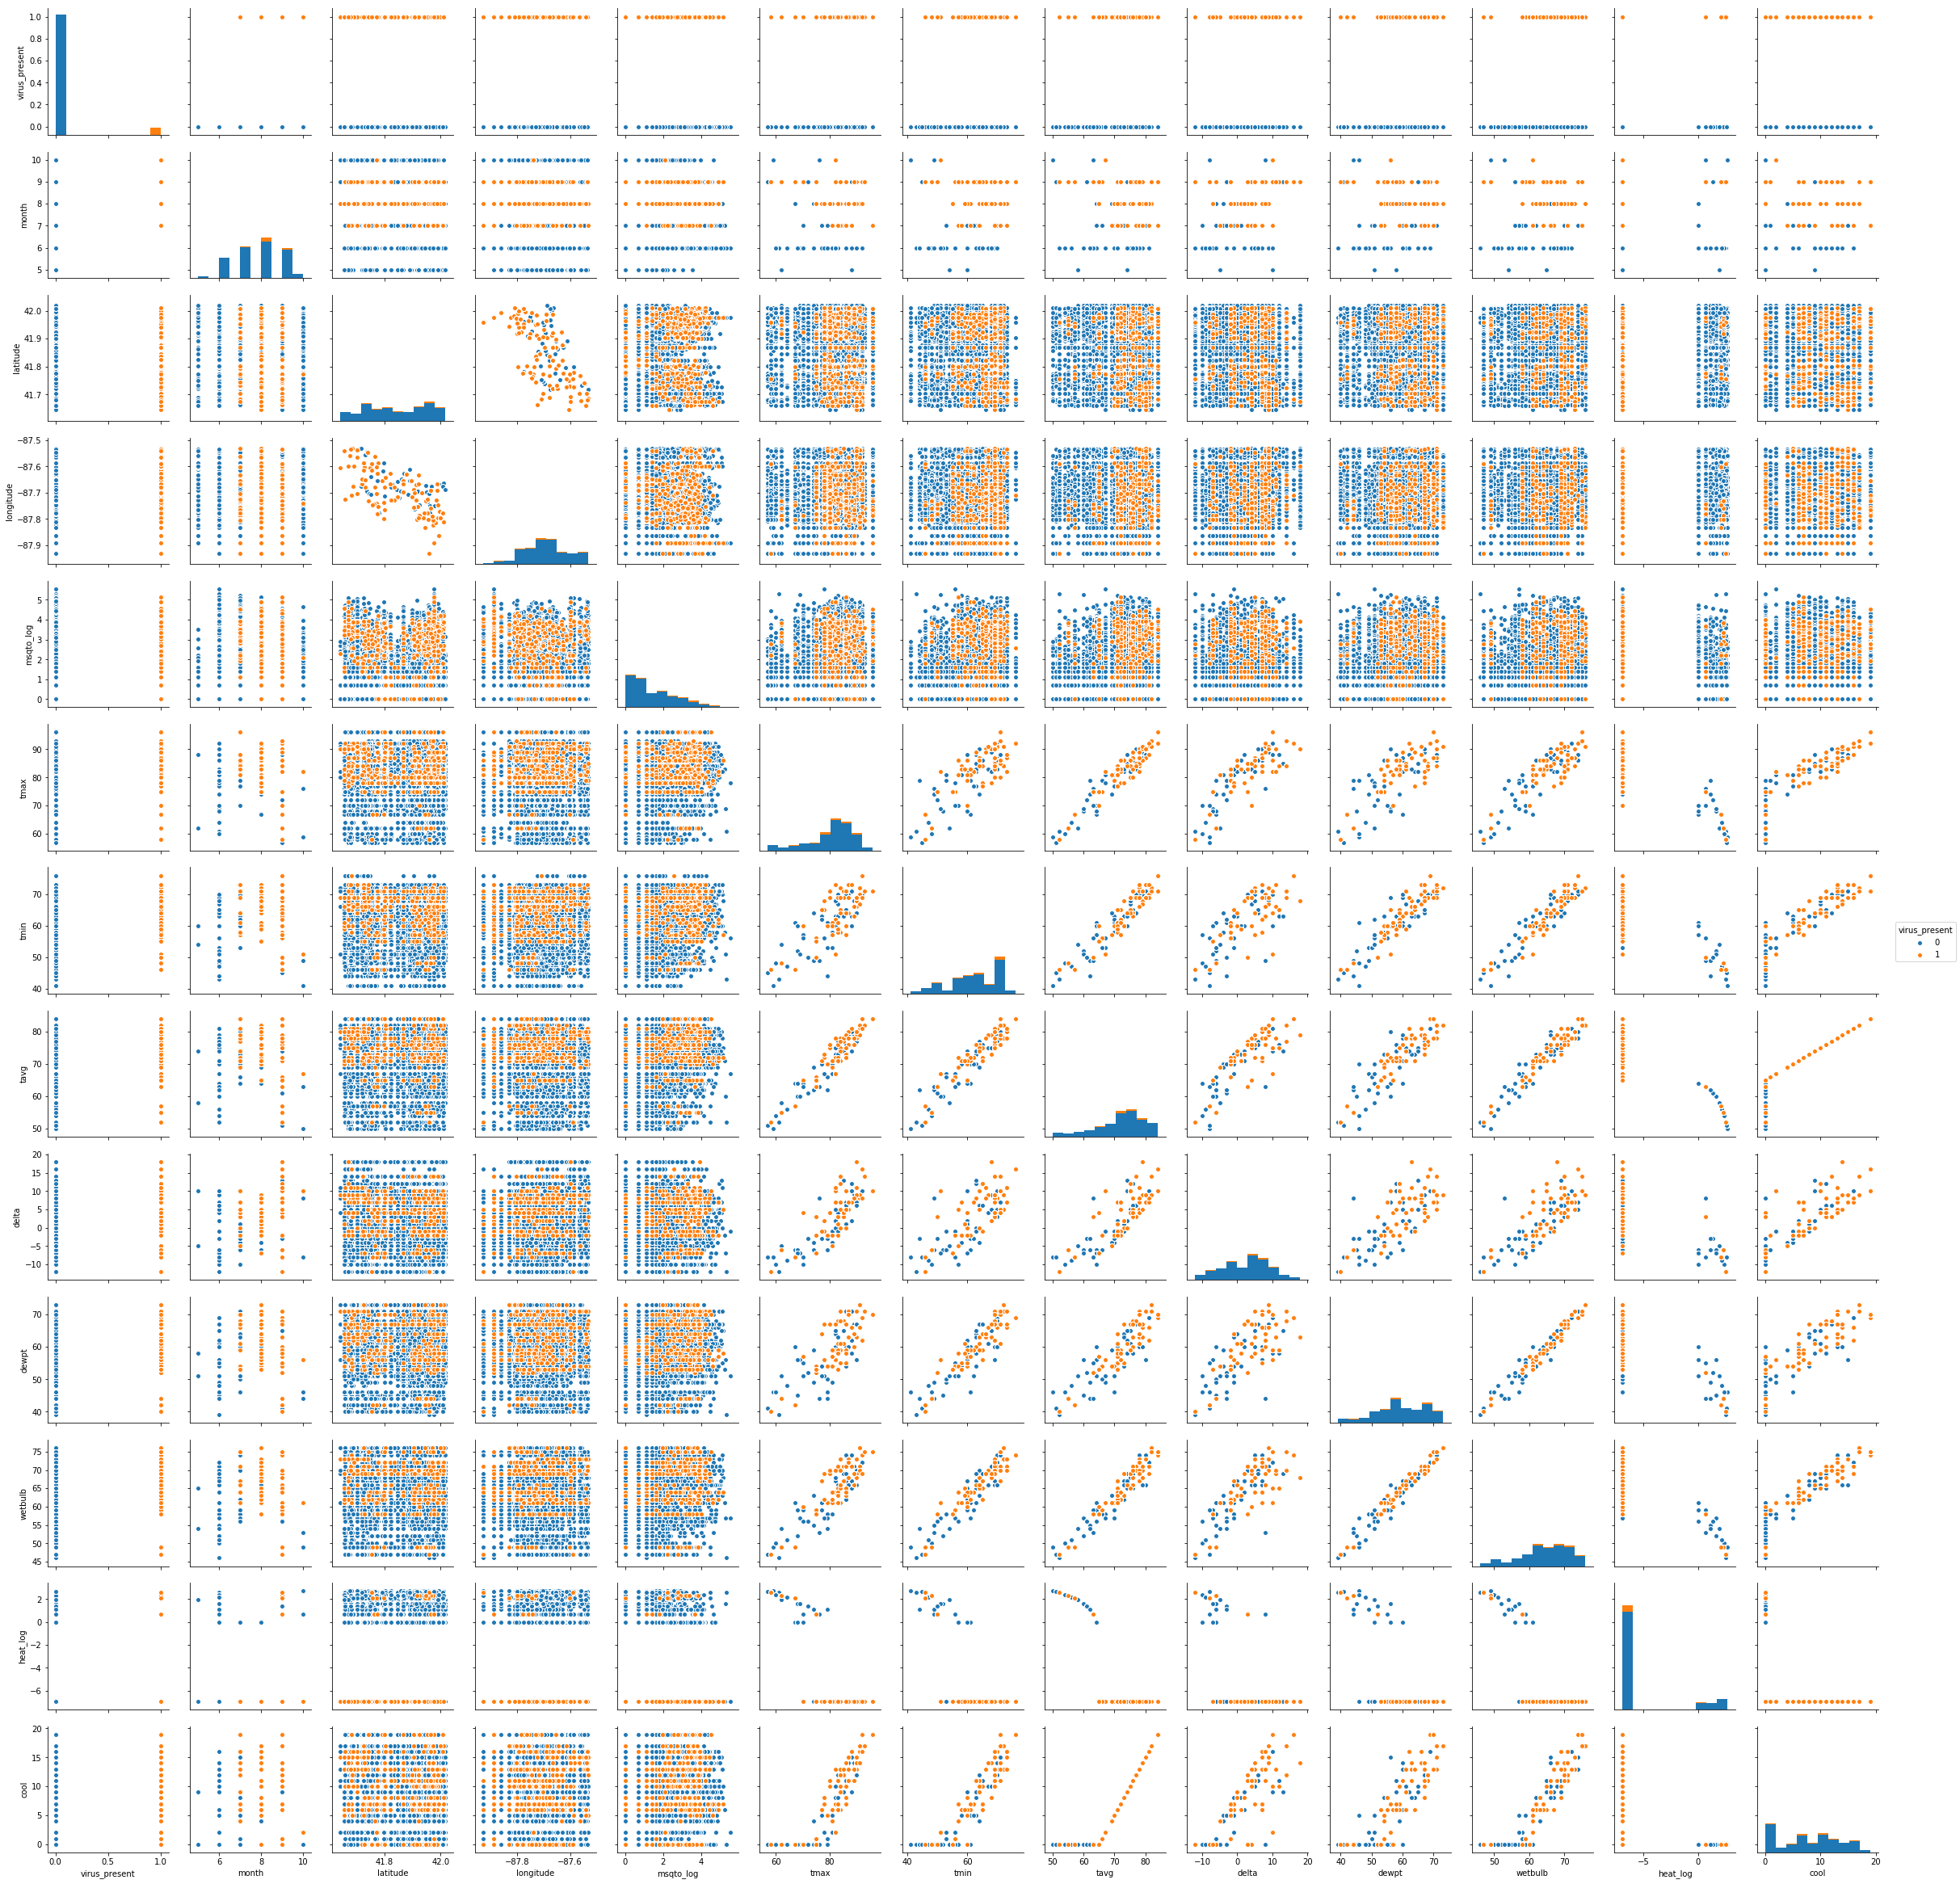

In [14]:
# validate after log transform
sns.pairplot(df_train[[df_train.columns[-1]]+X_col_log[1:13]],hue='virus_present')

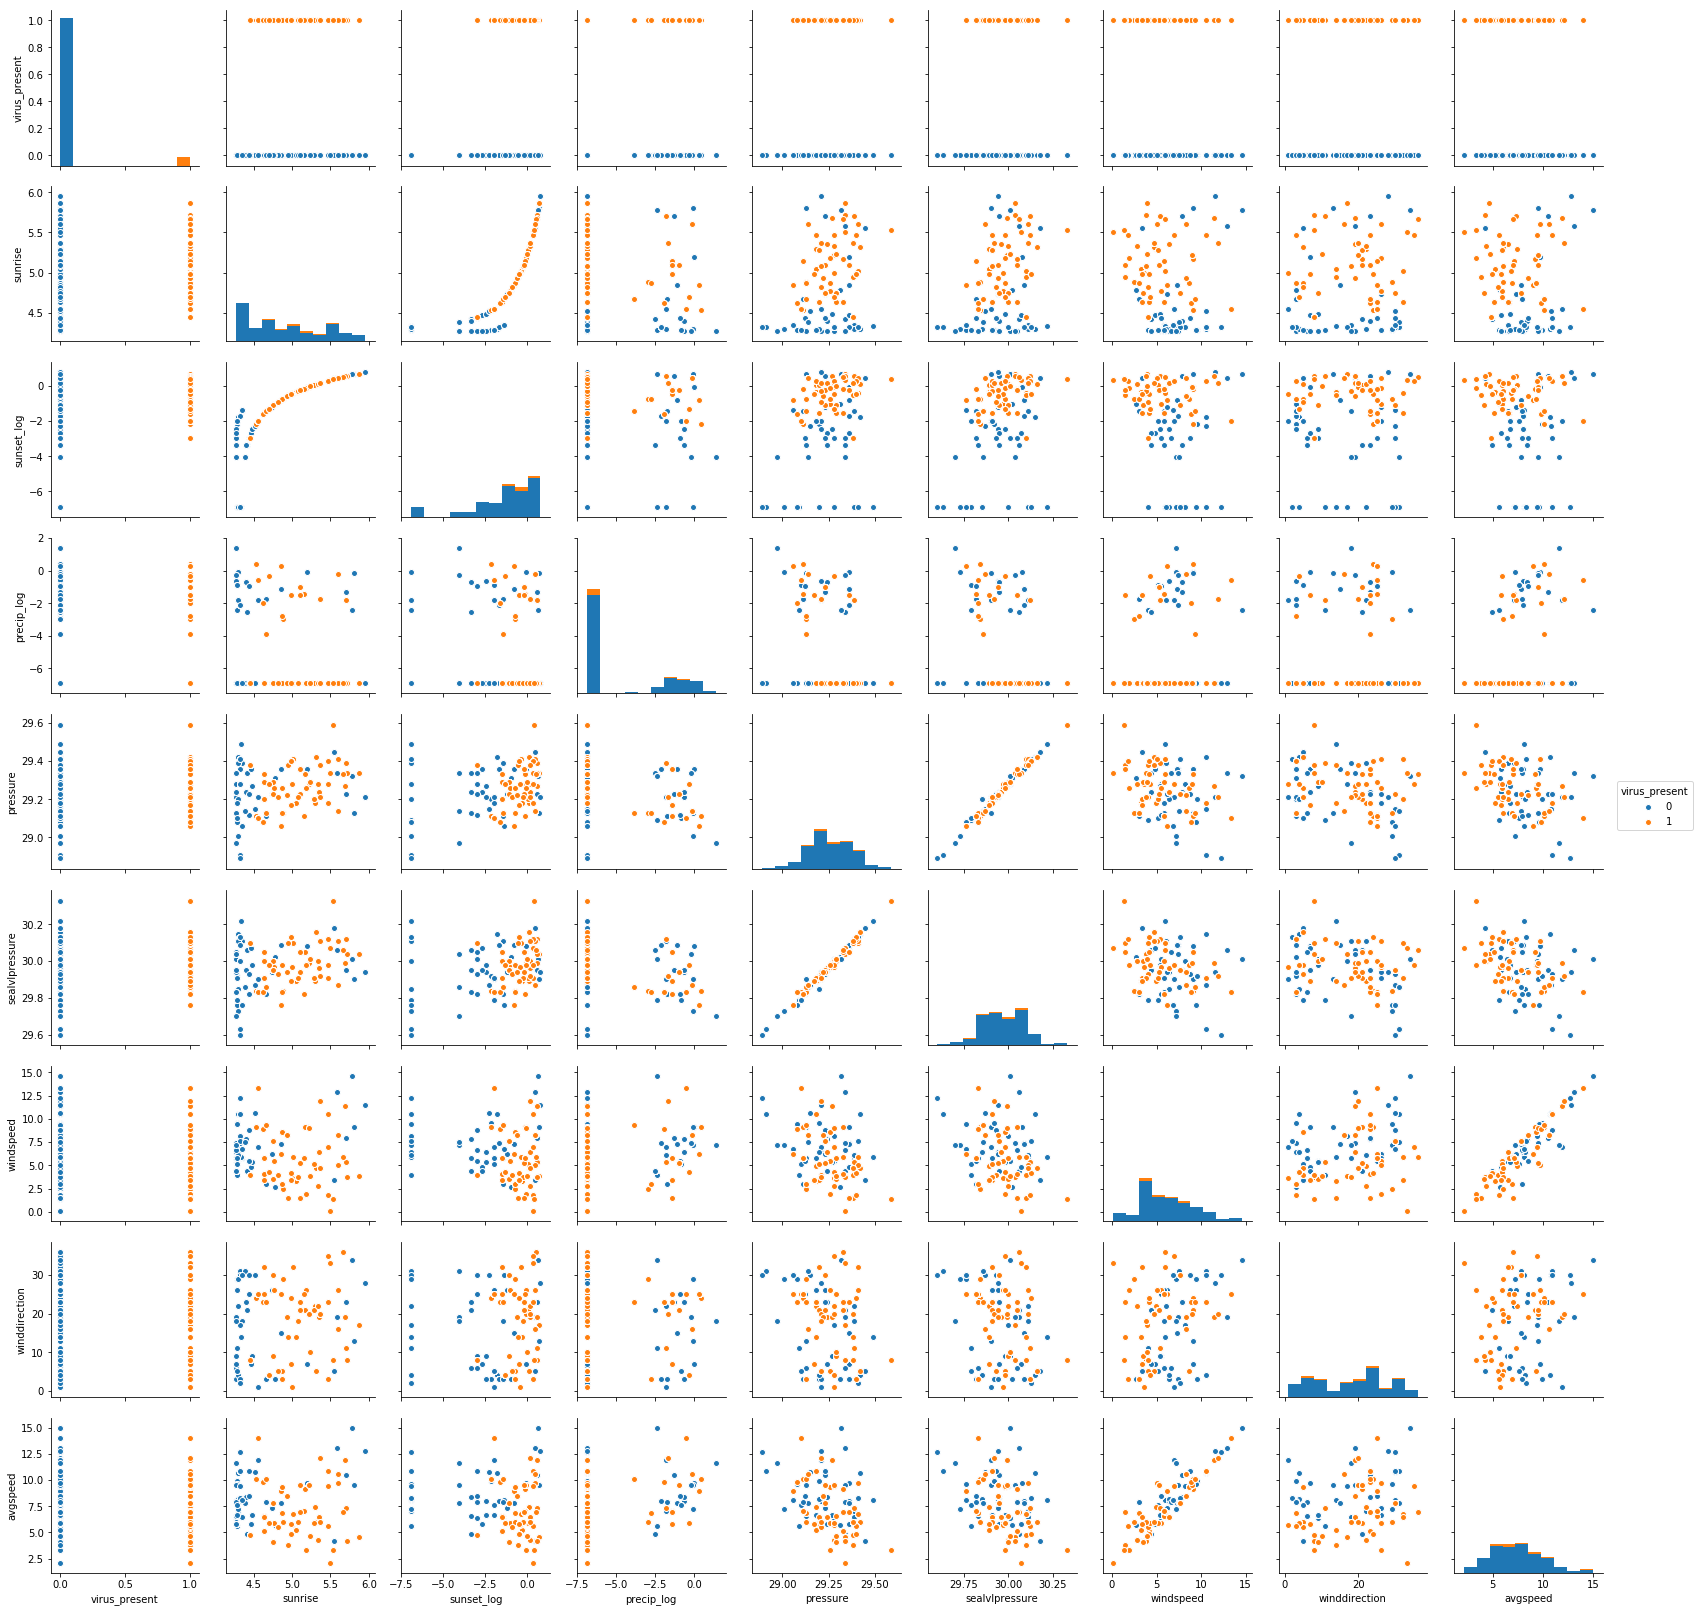

In [15]:
sns.pairplot(df_train[[df_train.columns[-1]]+X_col_log[13:-8]],hue='virus_present')